In [ ]:
# instant: record index
	# - dteday : date
	# - season : season (1:springer, 2:summer, 3:fall, 4:winter)
	# - yr : year (0: 2011, 1:2012)
	# - mnth : month ( 1 to 12)
	# - hr : hour (0 to 23)
	# - holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	# - weekday : day of the week
	# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	# + weathersit : 
	# 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	# 	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	# 	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	# 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	# - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	# - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	# - hum: Normalized humidity. The values are divided to 100 (max)
	# - windspeed: Normalized wind speed. The values are divided to 67 (max)
	# - casual: count of casual users
	# - registered: count of registered users
	# - cnt: count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
import os

In [3]:
data = pd.read_csv("day.csv")

data.head(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606


In [6]:
pd.set_option('display.max_columns', None)



data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
pd.set_option('display.max_columns', None)

data.head(3)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [9]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
#checking experimenation   columns
data.iloc[:10,0:6]
data.iloc[:10,6:10]
data.iloc[:10,10:20]

,atemp,hum,windspeed,casual,registered,cnt
0,0.363625,0.805833,0.160446,331,654,985
1,0.353739,0.696087,0.248539,131,670,801
2,0.189405,0.437273,0.248309,120,1229,1349
3,0.212122,0.590435,0.160296,108,1454,1562
4,0.229270,0.436957,0.186900,82,1518,1600
5,0.233209,0.518261,0.089565,88,1518,1606
6,0.208839,0.498696,0.168726,148,1362,1510
7,0.162254,0.535833,0.266804,68,891,959
8,0.116175,0.434167,0.361950,54,768,822
9,0.150888,0.482917,0.223267,41,1280,1321


In [13]:
data.iloc[:10,6:10]


,weekday,workingday,weathersit,temp
0,6,0,2,0.344167
1,0,0,2,0.363478
2,1,1,1,0.196364
3,2,1,1,0.200000
4,3,1,1,0.226957
5,4,1,1,0.204348
6,5,1,2,0.196522
7,6,0,2,0.165000
8,0,0,1,0.138333
9,1,1,1,0.150833


In [14]:
data.iloc[:10,10:20]

,atemp,hum,windspeed,casual,registered,cnt
0,0.363625,0.805833,0.160446,331,654,985
1,0.353739,0.696087,0.248539,131,670,801
2,0.189405,0.437273,0.248309,120,1229,1349
3,0.212122,0.590435,0.160296,108,1454,1562
4,0.229270,0.436957,0.186900,82,1518,1600
5,0.233209,0.518261,0.089565,88,1518,1606
6,0.208839,0.498696,0.168726,148,1362,1510
7,0.162254,0.535833,0.266804,68,891,959
8,0.116175,0.434167,0.361950,54,768,822
9,0.150888,0.482917,0.223267,41,1280,1321


In [ ]:
#dropping redundant variables
#drop casual & registered since i am  taking 
#total count (cnt)
data = data.drop(["instant","dteday",
"casual","registered"], axis=1)


In [18]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [19]:
data.describe()

#checking any minimum values or not



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [20]:
#chek correlation matrix
data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659


In [21]:

data.season.value_counts()



season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [22]:
data.mnth.value_counts()#not req since it has high cor with season 0.831440


mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64

In [23]:
data.weekday.value_counts()



weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

In [24]:
data.weathersit.value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [25]:
cat = ["season","mnth","weekday","weathersit"]


In [26]:
# trying without mnth
cat = ["season","weekday","weathersit"]

In [27]:
#creating  a dataset with all numeric variables
data_num = data.drop(cat,axis=1)

In [28]:
#creating  a dataset with all categorical variables
data_cat = data.loc[:,cat]


,season,weekday,weathersit
0,1,6,2
1,1,0,2


In [ ]:
data_cat.head(10)

In [31]:
#creating dummy variables
data_cat=pd.get_dummies(data = data_cat.astype(str), drop_first = True)
data_cat.head(2)

,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,True,False


In [32]:

data = pd.concat([data_num, data_cat], axis = 1)
data.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,1,0,0,0.344167,0.363625,0.805833,0.160446,985,False,False,False,False,False,False,False,False,True,True,False
1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,801,False,False,False,False,False,False,False,False,False,True,False
2,0,1,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,False,True,False,False,False,False,False,False,False
3,0,1,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,False,False,True,False,False,False,False,False,False
4,0,1,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,False,False,False,True,False,False,False,False,False


In [33]:
# NOW segregating ind and dep var
X = data.drop("cnt",axis=1)



In [34]:
y = data.loc[:,"cnt"]

In [35]:
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
test_size = 0.3, random_state = 123)



In [36]:
#Using linear regression
from sklearn.linear_model import LinearRegression



In [41]:
lin_reg = LinearRegression()


In [42]:
lin_reg.fit(train_X, train_y)


LinearRegression()

In [43]:
y_pred = lin_reg.predict(test_X)



In [52]:
d = pd.DataFrame()


,test_y
488,6421
421,3389
91,2252
300,3747
177,4708


In [54]:
d["test_y"] = test_y


In [56]:
d["y_pred"] = y_pred

In [57]:
d.head(5)

,test_y,y_pred
488,6421,5921.933975
421,3389,3550.909830
91,2252,2688.911290
300,3747,3214.786455
177,4708,4465.399215


In [50]:
###### mape with sklearn
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y,y_pred)

0.15859388665915158

In [58]:
mean_absolute_percentage_error(test_y,y_pred)*100

15.859388665915159

In [59]:
# Crosschecking Mape with formula
d["mp"] = abs((d["test_y"]- d["y_pred"])/d["test_y"])
(d.mp.mean())*100#mape
### achieved less than 16 percent

15.859388665915159

In [ ]:

from sklearn.metrics import mean_squared_error



In [61]:
mse = mean_squared_error(test_y,y_pred)


In [62]:
rmse = np.sqrt(mse)
rmse

838.902705133927

In [63]:
#K Fold cross validation as k fold gives rmse, k fold does not give mape but rmse
from sklearn.model_selection import cross_val_score




In [64]:
accuracies = cross_val_score(estimator = lin_reg,
scoring="neg_mean_squared_error",
X = train_X, y = train_y, cv = 10)
accuracies = np.sqrt(-accuracies)
accuracies
accuracies.mean()

### close to RMSE above even after k fold cross vaidation
#no overfitting of the model

838.635611613734

In [65]:
accuracies.std()

89.55796016927437

In [66]:
#######XGBOOST ################################### 
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
n_estimators = 10, seed = 123)



In [72]:
# Fitting the model
xgb_r.fit(train_X, train_y)


F:\anacondapython\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, num_parallel_tree=None, ...)

In [69]:
# Predict the model
y_pred = xgb_r.predict(test_X)

In [ ]:

d = pd.DataFrame()


In [70]:
d["test_y"] = test_y



In [71]:
d["y_pred"] = y_pred

In [73]:
d.head(5)

,test_y,y_pred,mp
488,6421,5951.268555,0.077724
421,3389,3043.128906,0.047775
91,2252,1947.558472,0.194010
300,3747,3686.508789,0.142037
177,4708,4743.104004,0.051529


In [74]:
###### mape with sklearn
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y,y_pred)


0.16723527731672333

In [75]:
d["mp"] = abs((d["test_y"]- d["y_pred"])/d["test_y"])
(d.mp.mean())*100#mape

16.723527731672334

In [84]:
############ hyperparameters #####

#shows paramters  
xgb_r.get_params
parameters = [{'max_depth': [4,5,6],'learning_rate': [0.3, 0.5], 
'gamma': [0,.01,.02]}]



In [85]:

import multiprocessing
multiprocessing.cpu_count()

8

In [86]:

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = xgb_r,
param_grid = parameters,
cv = 10, n_jobs = -1)#n_jobs = -1 is applying all CPUs



In [87]:
grid_search.fit(train_X, train_y)




F:\anacondapython\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:36:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=10,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid=[{'gamma': [0, 0.01, 0.02], 'learning_rate': [0.3, 0.5],
                          'max_depth': [4, 5, 6]}])

In [88]:
grid_search.best_score_


0.8694472730159759

In [89]:
grid_search.best_params_


{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 5}

In [83]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, num_parallel_tree=None, ...)

In [90]:
y_pred = grid_search.predict(test_X)

In [91]:

d = pd.DataFrame()
d["test_y"] = test_y
d["y_pred"] = y_pred


In [92]:
d.head()

,test_y,y_pred
488,6421,5977.629883
421,3389,3015.317871
91,2252,1905.090820
300,3747,3610.252441
177,4708,4845.444824


In [93]:


###### mape with sklearn
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y,y_pred)

0.16778828995232195

In [94]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y,y_pred)
rmse = np.sqrt(mse)
rmse

822.4752712140943

In [96]:
#K Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb_r,
scoring="neg_mean_squared_error",
X = train_X, y = train_y, cv = 10)
accuracies = np.sqrt(-accuracies)
accuracies
accuracies.mean()


F:\anacondapython\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
F:\anacondapython\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
F:\anacondapython\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
F:\anacondapython\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:41:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:lin

698.7933071889007

In [97]:
accuracies.std()

95.40428845756743

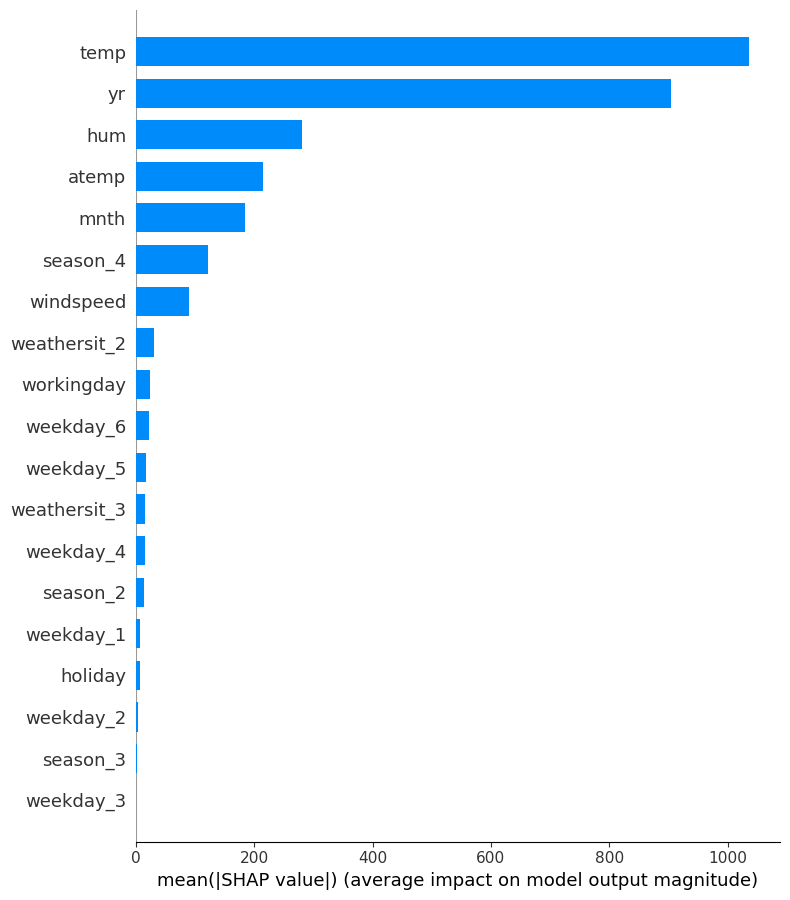

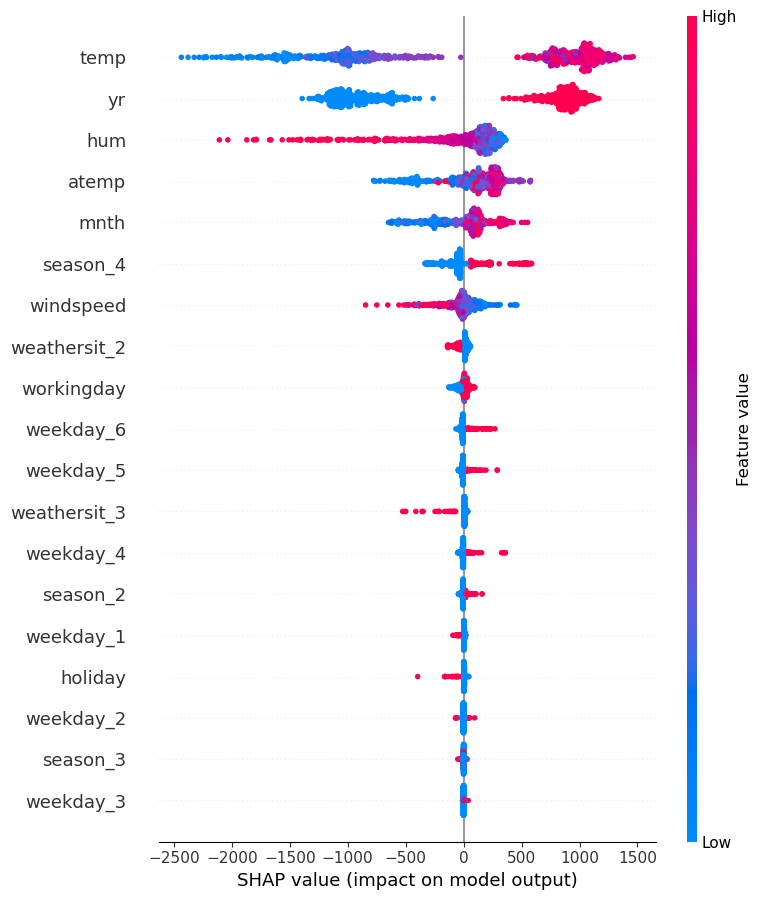

In [100]:

# Import the package
import shap
explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")
shap.summary_plot(shap_values, X)

In [102]:
#######Decision Tree  ##########################
# Instantiation
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor(random_state = 0) 
dt.fit(X, y)# Fitting the model


  

DecisionTreeRegressor(random_state=0)

In [103]:
dt.fit(train_X, train_y)


DecisionTreeRegressor(random_state=0)

In [104]:
# Predict the model
y_pred = dt.predict(test_X)

In [105]:

d = pd.DataFrame()
d["test_y"] = test_y
d["y_pred"] = y_pred


In [106]:

###### mape with sklearn
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y,y_pred)

#Mape with formula
d["mp"] = abs((d["test_y"]- d["y_pred"])/d["test_y"])
(d.mp.mean())*100#mape

18.807626682560784

In [107]:

#shows paramters  
DecisionTreeRegressor()
dt.get_params




<bound method BaseEstimator.get_params of DecisionTreeRegressor(random_state=0)>

In [108]:

parameters={"splitter":["best","random"],
"max_depth" : [1,3,5,7,9,11,12],
"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
"max_features":["auto","log2","sqrt",None],
"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
###its taking a long time






In [112]:
parameters={"splitter":["best","random"],
"max_depth" : [1,3,5,7,9,11,12] }


In [113]:
import multiprocessing
multiprocessing.cpu_count()

8

In [114]:

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = dt,
param_grid = parameters,
cv = 2, n_jobs = -1)






In [115]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'splitter': ['best', 'random']})

In [116]:
grid_search.best_score_


0.7812916848001131

In [117]:
grid_search.best_params_


{'max_depth': 5, 'splitter': 'best'}

In [118]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, random_state=0)

In [119]:
y_pred = grid_search.predict(test_X)




In [120]:
d = pd.DataFrame()
d["test_y"] = test_y
d["y_pred"] = y_pred

In [121]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y,y_pred)

####decision tree is bad not good performance


0.19761820180979622

In [122]:

#######Random Forest  ##########################
# Instantiation
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X, y)



RandomForestRegressor(n_estimators=1000, random_state=42)

In [123]:
rf.fit(train_X, train_y)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [124]:
# Predict the model
y_pred = rf.predict(test_X)

In [125]:

d = pd.DataFrame()
d["test_y"] = test_y
d["y_pred"] = y_pred



In [126]:
###### mape with sklearn
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y,y_pred)


0.16146219338021514

In [127]:
#Mape with formula
d["mp"] = abs((d["test_y"]- d["y_pred"])/d["test_y"])
(d.mp.mean())*100#mape


16.146219338021513

In [128]:
RandomForestRegressor()
rf.get_params


<bound method BaseEstimator.get_params of RandomForestRegressor(n_estimators=1000, random_state=42)>

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]

In [133]:
parameters={"max_depth":[5,10,15],
'min_samples_leaf': [3, 4, 5] }
##for shorter time

In [129]:
import multiprocessing
multiprocessing.cpu_count()


8

In [134]:

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf,
param_grid = parameters,
cv = 2, n_jobs = -1)

In [135]:

grid_search.fit(train_X, train_y)



GridSearchCV(cv=2,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [3, 4, 5]})

In [ ]:
y_pred = grid_search.predict(test_X)

In [140]:
grid_search.best_score_


0.8399092799325834

In [141]:
grid_search.best_params_


{'max_depth': 15, 'min_samples_leaf': 3}

In [142]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=1000,
                      random_state=42)

In [143]:

d = pd.DataFrame()
d["test_y"] = test_y
d["y_pred"] = y_pred


In [158]:
###### mape with sklearn
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_y,y_pred)*100

45.280633827282784

In [145]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y,y_pred)
rmse = np.sqrt(mse)
rmse

814.4239748301546

In [148]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf,
scoring="neg_mean_squared_error",
X = train_X, y = train_y, cv = 10)
accuracies = np.sqrt(-accuracies)

#cv 10

In [149]:
accuracies


array([832.95911326, 629.7685582 , 526.80531414, 592.56568922,
       713.24918653, 785.81556176, 622.97543738, 615.97941963,
       599.43301807, 786.71501821])

In [151]:
accuracies.mean()

670.626631639924

In [152]:
accuracies.std()

96.79177075931909

In [153]:
####Lets check one last with SVR

####### SVM  ##########################
# Instantiation
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')

  





In [154]:

svr.fit(train_X, train_y)


SVR()

In [155]:
# Predict the model
y_pred = svr.predict(test_X)

In [156]:

d = pd.DataFrame()
d["test_y"] = test_y
d["y_pred"] = y_pred


In [157]:
d["mp"] = abs((d["test_y"]- d["y_pred"])/d["test_y"])
(d.mp.mean())*100#mape

**very bad mape

45.280633827282784

In [ ]:
#Final tally linear regression gave vest mape of 15.85  ,

#followed by RF 16.14

#followed by Xg boost 16.72



